> TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

> y : CDRGLOB 

> X : all columns except for the label Train-test split: .80-.20 (please use the stratify parameter) Cross-validation both with k=5 and k=10

> Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.


In [68]:
import pandas as pd
data = pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
data

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [69]:
Y = data['CDRGLOB']
X = data.drop(['CDRGLOB'], axis=1)

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size=0.2)

In [72]:
from sklearn.model_selection import cross_val_score
for i in range(5,11,5):
  cv_score = cross_val_score(model, X_train, y_train, cv = i)
  print("k = {} için skor değerleri : {}".format(i, cv_score))
  print("Ortalama Skor : {}".format(cv_score.mean()))

k = 5 için skor değerleri : [0.66820276 0.58525346 0.66359447 0.52777778 0.5787037 ]
Ortalama Skor : 0.6047064345451443
k = 10 için skor değerleri : [0.64220183 0.66055046 0.5412844  0.62037037 0.62037037 0.62962963
 0.52777778 0.57407407 0.56481481 0.62962963]
Ortalama Skor : 0.6010703363914374


> TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values on the test dataset.


In [73]:
import matplotlib.pylab as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
print("Modelin doğruluğu = {}".format(accuracy_score(y_test, y_model)))

Modelin doğruluğu = 0.6937269372693727


In [74]:
param_grid={'max_depth': [10,25,50,75,90],
    'max_features': [2,3,4,5,6],
    'min_samples_split': [3,5,8,10,12],
    }

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose=1)
grid_search.fit(X_train, y_train)
y_model2 = grid_search.predict(X_test)
print("Grid Search'e göre Model Doğruluğu = {}".format(accuracy_score(y_test, y_model2)))

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Grid Search'e göre Model Doğruluğu = 0.6974169741697417


In [75]:
grid_search.best_params_

{'max_depth': 25, 'max_features': 6, 'min_samples_split': 8}

before GridSearch:  0.6937269372693727
after GridSearch:  0.6974169741697417


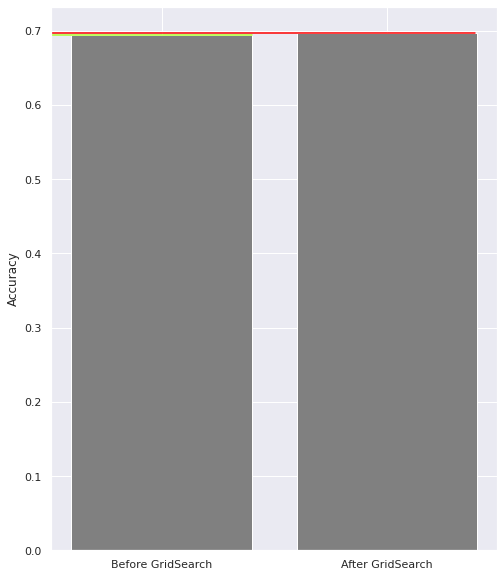

In [98]:
rfc = grid_search.best_estimator_
my_predictions = rfc.fit(X_train,y_train).predict(X_test)
print("before GridSearch: ",accuracy_score(y_test, y_model))
print("after GridSearch: ",accuracy_score(y_test, y_model2))
plt.figure(figsize=(8, 10))
plt.bar(range(2), [accuracy_score(y_test, y_model),accuracy_score(y_test, y_model2)], align='center', color="gray")
plt.ylabel("Accuracy")
plt.axhline(y=accuracy_score(y_test, y_model), color="greenyellow", linestyle="solid",xmax=0.45)
plt.axhline(y=accuracy_score(y_test, y_model2), color="red", linestyle="solid",xmax=0.95)
plt.xticks(range(2), ["Before GridSearch","After GridSearch"])
plt.show()

> TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.



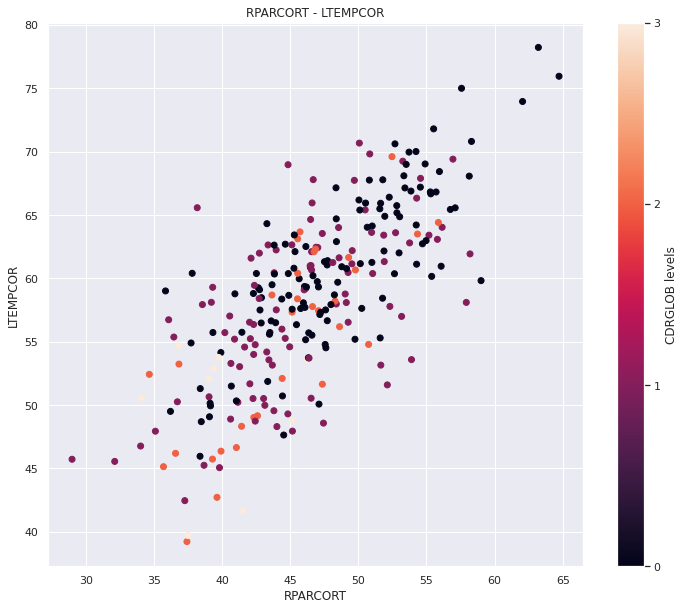

In [106]:
plt.figure(figsize=(12, 10))
plt.scatter(X_test["RPARCORT"], X_test["LTEMPCOR"],c=y_test)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

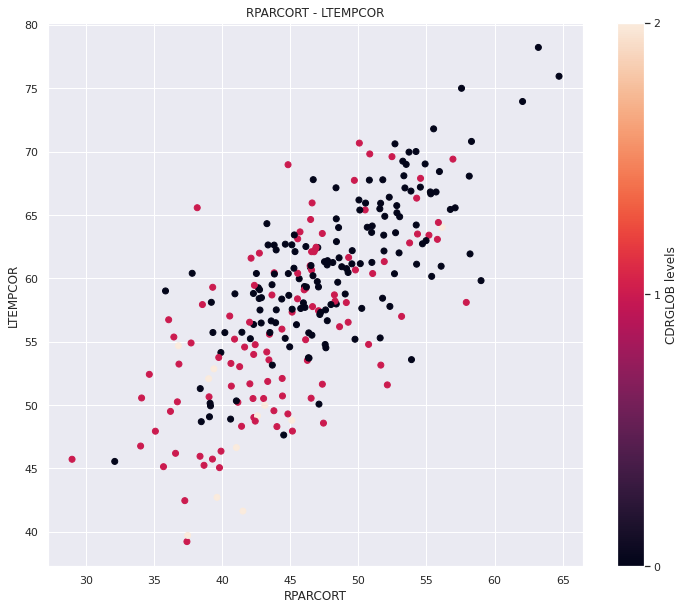

In [107]:
plt.figure(figsize=(12, 10))
plt.scatter(X_test["RPARCORT"], X_test["LTEMPCOR"],c=y_model2)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

> TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions.



Text(0, 0.5, 'Feature 2')

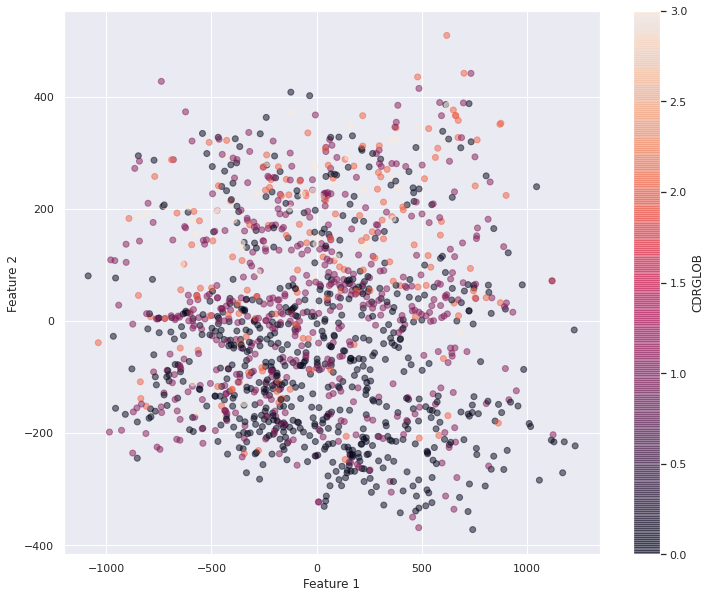

In [105]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
isomap_data = iso.transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(isomap_data[:, 0], isomap_data[:, 1], c=Y, alpha=0.5)
plt.colorbar(label='CDRGLOB')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

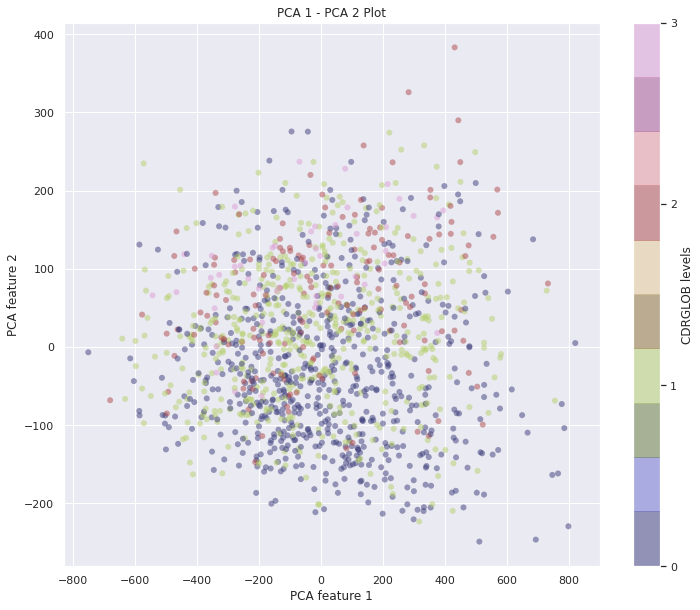

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_x = pca.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(pca_x[:, 0], pca_x[:, 1],c=Y,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab20b', 10))
plt.title("PCA 1 - PCA 2 Plot")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("PCA feature 2")
plt.xlabel("PCA feature 1")
plt.show()

> TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.



In [126]:
from  sklearn.mixture import GaussianMixture
model=GaussianMixture()
model.fit(X_train,y_train)
y_model=model.predict(X_test)
accuracy_score(y_test,y_model)

0.47232472324723246

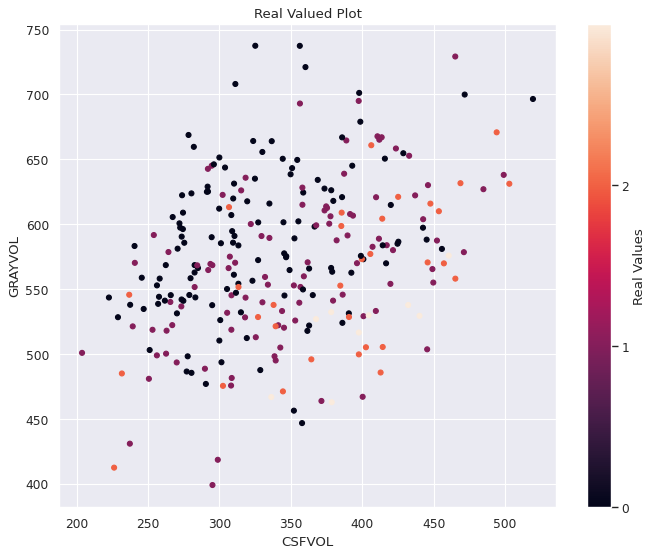

In [127]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test['CSFVOL'], X_test["GRAYVOL"],c=y_test,s=20)
plt.title("Real Valued Plot")
plt.colorbar(label="Real Values",ticks=range(3))
plt.xlabel("CSFVOL")
plt.ylabel("GRAYVOL")
plt.show();

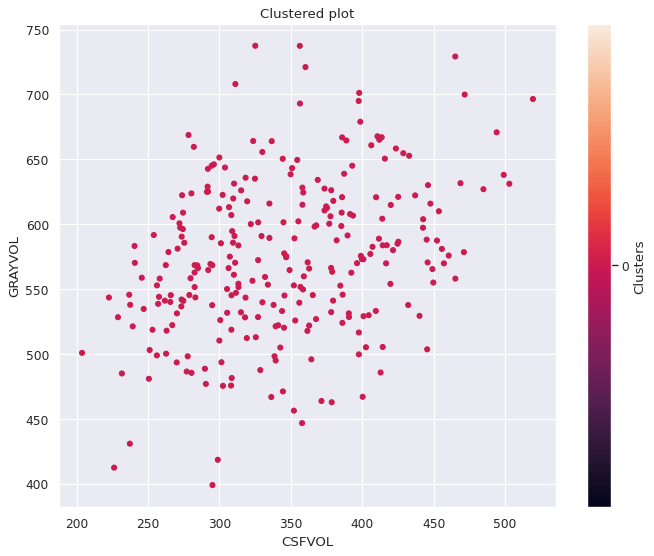

In [128]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=0)
my_clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10, 8))
plt.scatter(X_test["CSFVOL"], X_test["GRAYVOL"],c=y_model, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.xlabel("CSFVOL")
plt.ylabel("GRAYVOL")
plt.show();

In [129]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters = 3)
model.fit(X_train, y_train)
y_model = model.predict(X_test)
accuracy_score(y_test, y_model)

0.25830258302583026

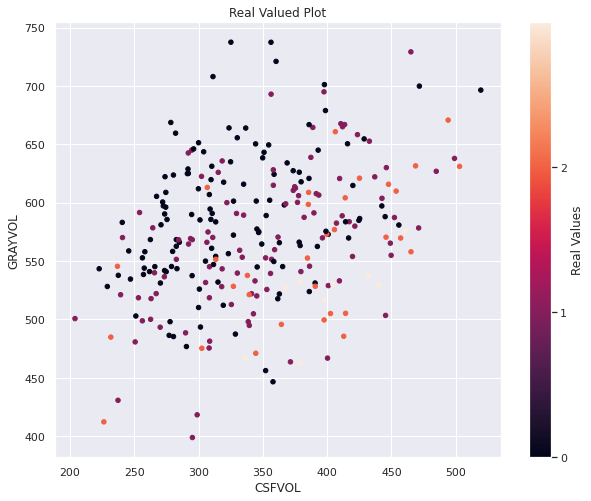

In [132]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test['CSFVOL'], X_test["GRAYVOL"],c=y_test,s=20)
plt.title("Real Valued Plot")
plt.colorbar(label="Real Values",ticks=range(3))
plt.xlabel("CSFVOL")
plt.ylabel("GRAYVOL")
plt.show();

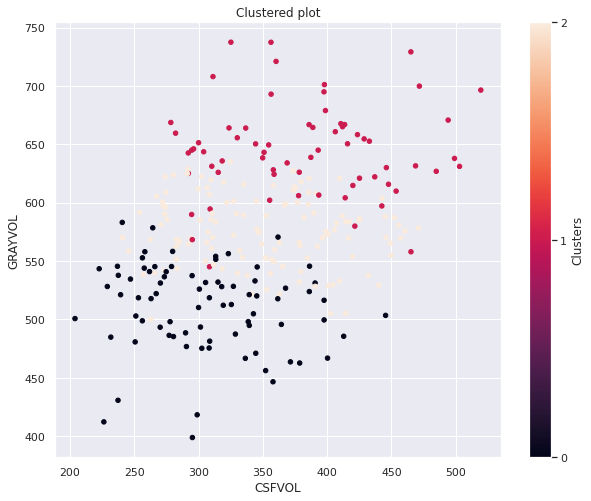

In [133]:
plt.figure(figsize=(10, 8))
plt.scatter(X_test["CSFVOL"], X_test["GRAYVOL"],c=y_model, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.xlabel("CSFVOL")
plt.ylabel("GRAYVOL")
plt.show();